In [46]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [47]:
#Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

#This zip objects packs each pair of lats and lngs having the same index in their respective array into a tuple

In [48]:
#Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [49]:
#Use the citipy module to determine city based on latitude and longitude
from citipy import citipy

In [50]:
#Create a list for holding the cities
cities = []

#Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count
len(cities)

620

In [51]:
#Import dependencies
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [52]:
#Create an empty list to hold the weather data
city_data = []

#Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

#Loop through all the cities in our list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    #Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 toS the record count
    record_count += 1

    ### Code Breakdown ###
    #Create a for loop with the enumerate() method and reference the index and the city in the list
    #Check if the remainder of the index divided by 50 is equal to zero, AND if the index is greater than or equal to 50,
    # using a conditional statement.
    #Create a URL endpoint in the conditional statement. However, we are removing blank spaces in the city name and 
    # concatenating the city name using city.replace(" ","+"). This will find the corresponding weather data for the city
    # instead of finding the weather data for the first part of the city name.
    #Add a print statement that tells the record count, set count, and the city that is being processed
    #Then add 1 to the record count before the next city is processed

#Run an API request for each of the cites 
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #Parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list
        city_data.append({'City': city.title(),
                          'Lat': city_lat, 
                          'Lng': city_lng, 
                          'Max Temp': city_max_temp, 
                          'Humidity': city_humidity, 
                          'Cloudiness': city_clouds, 
                          'Wind Speed': city_wind, 
                          'Country': city_country, 
                          'Date': city_date})
#If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

#Indicate that the Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

    ### Code Breakdown ###
    #Parse the JSON file for the current city.
    #If there is weather data for the city, the metrics are retrieved.
    #The cities list is appended with a dictionary for that city, where the key value pairs 
    # are the values from the parameters.
    #Add the try and except block.
    #Add a pass statement to handle all errors encountered and to allow the program to continue.

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port moresby
Processing Record 2 of Set 1 | cumaribo
City not found. Skipping...
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | hereford
Processing Record 8 of Set 1 | geraldton
Processing Record 9 of Set 1 | candawaga
City not found. Skipping...
Processing Record 10 of Set 1 | hithadhoo
Processing Record 11 of Set 1 | talnakh
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | puerto escondido
Processing Record 14 of Set 1 | bengkulu
Processing Record 15 of Set 1 | ketchikan
Processing Record 16 of Set 1 | kjollefjord
Processing Record 17 of Set 1 | skalistyy
City not found. Skipping...
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | maningrida
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...


Processing Record 36 of Set 4 | zhanaozen
Processing Record 37 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 38 of Set 4 | airai
Processing Record 39 of Set 4 | ponta do sol
Processing Record 40 of Set 4 | san angelo
Processing Record 41 of Set 4 | trinidad
Processing Record 42 of Set 4 | sangeorz-bai
City not found. Skipping...
Processing Record 43 of Set 4 | port blair
Processing Record 44 of Set 4 | pochutla
Processing Record 45 of Set 4 | san andres
Processing Record 46 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 47 of Set 4 | praia da vitoria
Processing Record 48 of Set 4 | necochea
Processing Record 49 of Set 4 | maniitsoq
Processing Record 50 of Set 4 | saleaula
City not found. Skipping...
Processing Record 1 of Set 5 | loiza
Processing Record 2 of Set 5 | lima
Processing Record 3 of Set 5 | grindavik
Processing Record 4 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 5 | cherskiy
Processing Record 6 

Processing Record 20 of Set 8 | chimichagua
Processing Record 21 of Set 8 | invermere
Processing Record 22 of Set 8 | yabelo
Processing Record 23 of Set 8 | meulaboh
Processing Record 24 of Set 8 | litovko
Processing Record 25 of Set 8 | puerto el triunfo
Processing Record 26 of Set 8 | terrace bay
Processing Record 27 of Set 8 | zabid
Processing Record 28 of Set 8 | kosice
Processing Record 29 of Set 8 | hasaki
Processing Record 30 of Set 8 | atasu
Processing Record 31 of Set 8 | sakaraha
Processing Record 32 of Set 8 | erhlin
City not found. Skipping...
Processing Record 33 of Set 8 | santa cruz del sur
Processing Record 34 of Set 8 | roma
Processing Record 35 of Set 8 | kindu
Processing Record 36 of Set 8 | mahanoro
Processing Record 37 of Set 8 | yei
Processing Record 38 of Set 8 | riberalta
Processing Record 39 of Set 8 | calama
Processing Record 40 of Set 8 | la romana
Processing Record 41 of Set 8 | kaeo
Processing Record 42 of Set 8 | sofiysk
City not found. Skipping...
Process

Processing Record 8 of Set 12 | ozinki
Processing Record 9 of Set 12 | katsuura
Processing Record 10 of Set 12 | klaksvik
Processing Record 11 of Set 12 | astoria
Processing Record 12 of Set 12 | solwezi
Processing Record 13 of Set 12 | constitucion
Processing Record 14 of Set 12 | upata
Processing Record 15 of Set 12 | moron
Processing Record 16 of Set 12 | buariki
City not found. Skipping...
Processing Record 17 of Set 12 | teya
Processing Record 18 of Set 12 | livramento
Processing Record 19 of Set 12 | baillif
Processing Record 20 of Set 12 | serenje
Processing Record 21 of Set 12 | verkhnyaya inta
Processing Record 22 of Set 12 | chany
Processing Record 23 of Set 12 | harper
Processing Record 24 of Set 12 | aranos
Processing Record 25 of Set 12 | tacuarembo
Processing Record 26 of Set 12 | bartica
Processing Record 27 of Set 12 | sao jose da coroa grande
Processing Record 28 of Set 12 | kolosovka
Processing Record 29 of Set 12 | nikolayevsk-na-amure
Processing Record 30 of Set 12 

In [53]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Moresby,-9.4431,147.1797,89.02,66,40,17.27,PG,2022-05-04 03:34:31
1,Kapaa,22.0752,-159.3190,80.58,81,100,18.41,US,2022-05-04 03:34:31
2,Port Alfred,-33.5906,26.8910,61.18,96,24,8.03,ZA,2022-05-04 03:34:32
3,Atuona,-9.8000,-139.0333,79.23,79,100,18.61,PF,2022-05-04 03:34:32
4,Busselton,-33.6500,115.3333,63.55,44,4,13.58,AU,2022-05-04 03:34:32
5,Hereford,52.0568,-2.7148,52.00,95,100,2.30,GB,2022-05-04 03:34:33
6,Geraldton,-28.7667,114.6000,73.81,43,5,20.71,AU,2022-05-04 03:34:33
7,Hithadhoo,-0.6000,73.0833,80.19,86,100,23.55,MV,2022-05-04 03:34:34
8,Talnakh,69.4865,88.3972,20.21,91,100,6.76,RU,2022-05-04 03:34:34
9,Bluff,-46.6000,168.3333,63.81,71,29,3.40,NZ,2022-05-04 03:34:35


In [54]:
#Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Moresby,PG,2022-05-04 03:34:31,-9.4431,147.1797,89.02,66,40,17.27
1,Kapaa,US,2022-05-04 03:34:31,22.0752,-159.3190,80.58,81,100,18.41
2,Port Alfred,ZA,2022-05-04 03:34:32,-33.5906,26.8910,61.18,96,24,8.03
3,Atuona,PF,2022-05-04 03:34:32,-9.8000,-139.0333,79.23,79,100,18.61
4,Busselton,AU,2022-05-04 03:34:32,-33.6500,115.3333,63.55,44,4,13.58
5,Hereford,GB,2022-05-04 03:34:33,52.0568,-2.7148,52.00,95,100,2.30
6,Geraldton,AU,2022-05-04 03:34:33,-28.7667,114.6000,73.81,43,5,20.71
7,Hithadhoo,MV,2022-05-04 03:34:34,-0.6000,73.0833,80.19,86,100,23.55
8,Talnakh,RU,2022-05-04 03:34:34,69.4865,88.3972,20.21,91,100,6.76
9,Bluff,NZ,2022-05-04 03:34:35,-46.6000,168.3333,63.81,71,29,3.40


In [55]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [56]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [57]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1651635742.3091996

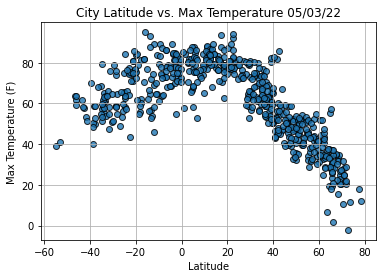

In [58]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

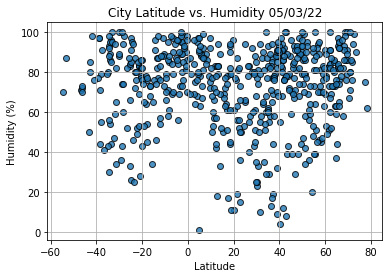

In [59]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

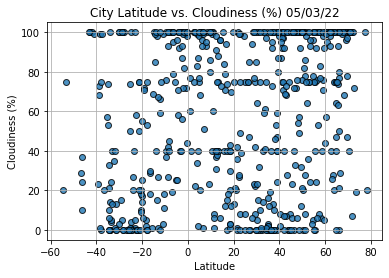

In [60]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

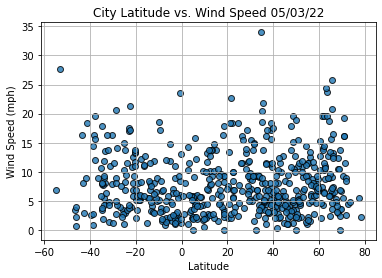

In [61]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()